# Exercise 1.

add dvdt and dxdt together: https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html

code of animation plot reference: https://cocalc.com/share/public_paths/aec115e33b62521ae12efdeef22fb993b326dab9 and https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/



[ 0.         -0.01981135 -0.03958636 -0.05928732 -0.07887416 -0.09830385
 -0.11753054 -0.13650617 -0.1551815  -0.17350726 -0.19143518 -0.20891857
 -0.22591254 -0.24237367 -0.25825931 -0.27352684 -0.28813291 -0.30203308
 -0.31518187 -0.3275333  -0.33904196 -0.34966433 -0.35936019 -0.36809396
 -0.37583567 -0.38256144 -0.38825347 -0.39289946 -0.39649174 -0.39902617
 -0.40050107 -0.40091634 -0.40027289 -0.39857243 -0.39581754 -0.39201199
 -0.38716122 -0.3812728  -0.37435685 -0.36642635 -0.35749732 -0.34758888
 -0.33672314 -0.32492514 -0.31222259 -0.29864569 -0.28422697 -0.26900112
 -0.25300497 -0.23627747 -0.21885965 -0.20079462 -0.18212737 -0.16290455
 -0.14317403 -0.1229846  -0.10238554 -0.08142642 -0.06015703 -0.03862753
 -0.01688857  0.00500848  0.02701149  0.04906767]


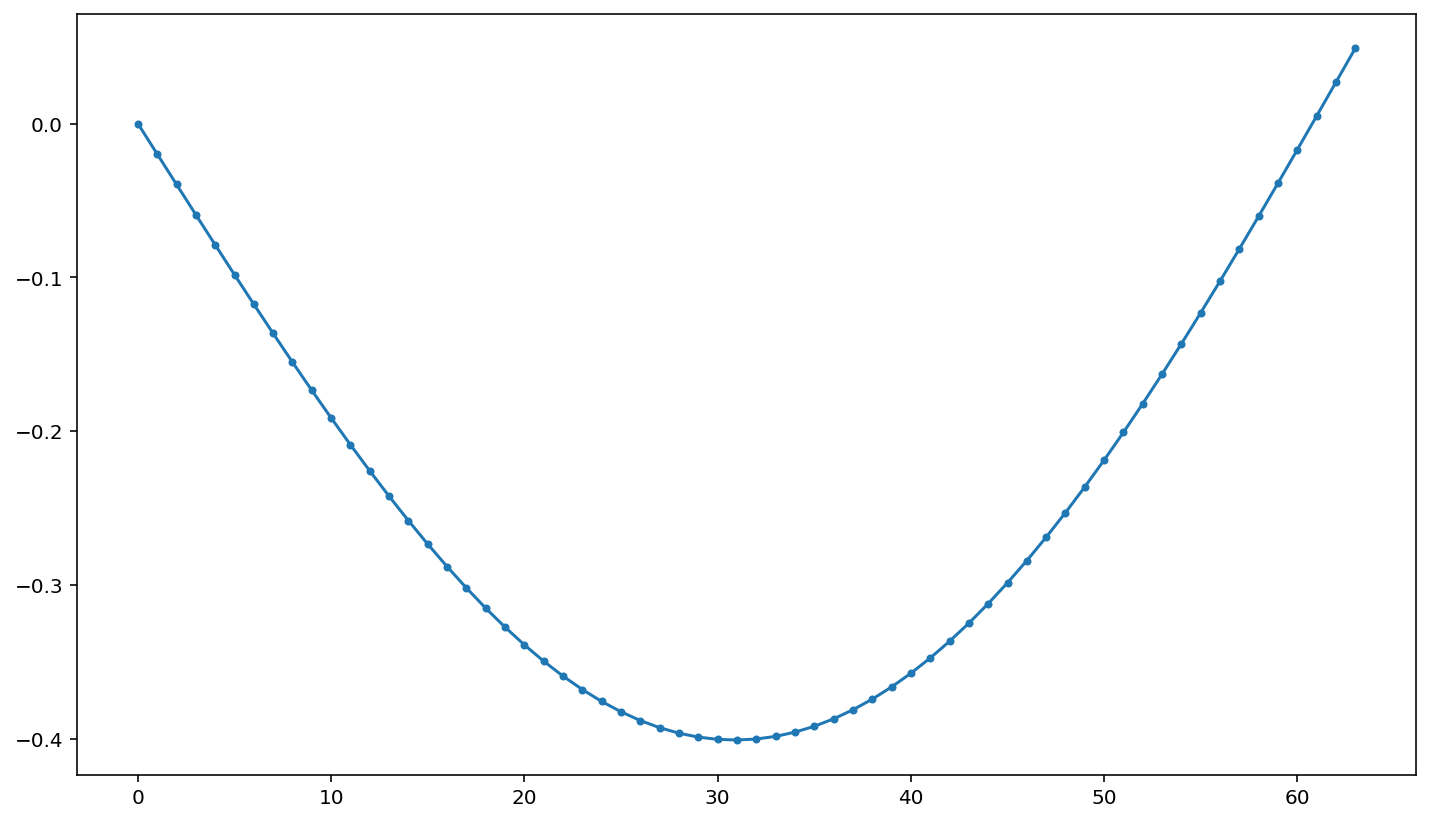

In [11]:
import numpy as np 

# set up 
n = 64 
k = 1
t_max = 10000
position = lambda j: np.sin(np.pi*j/n)

# initial conditions
x0 = np.array([position(j) for j in range(n)])
v0 = np.zeros(n)

# differential equations
def dxdt(t, x):
    # x[:n] are positions (x), x[n:] are velocities (v)
    x, v = x[:n], x[n:] # positions and velocities
    dxdt = v 
    dvdt = np.zeros(n)
    dvdt[1:-1] = k * (x[2:n] + x[:n-2] - 2 * x[1:n-1])
    return np.concatenate((dxdt, dvdt), axis=0)

# RK4 Method
def rk41d(f,x0,t0,tmax,dt):
    t = np.arange(t0,tmax+dt,dt)
    x = np.zeros((len(t),len(x0)))
    x[0,:] = x0
    for n in range(len(t)-1):
        k1 = f(t[n], x[n,:])
        k2 = f(t[n] + dt/2, x[n,:] + dt/2 * k1)
        k3 = f(t[n] + dt/2, x[n,:] + dt/2 * k2)
        k4 = f(t[n] + dt, x[n,:] + dt * k3)
        x[n+1] = x[n] + dt/6 * (k1 + 2*k2 + 2*k3 + k4)
    return t, x

# solve the system
initial_conditions = np.concatenate((x0, v0),axis=0)
# apply RK4 method
t, x = rk41d(dxdt, initial_conditions, 0, t_max, 1)

#print(x[0, :n])
print(x[5000,:n])

import matplotlib.pyplot as plt
plt.plot(x[5000, :n], '.-')

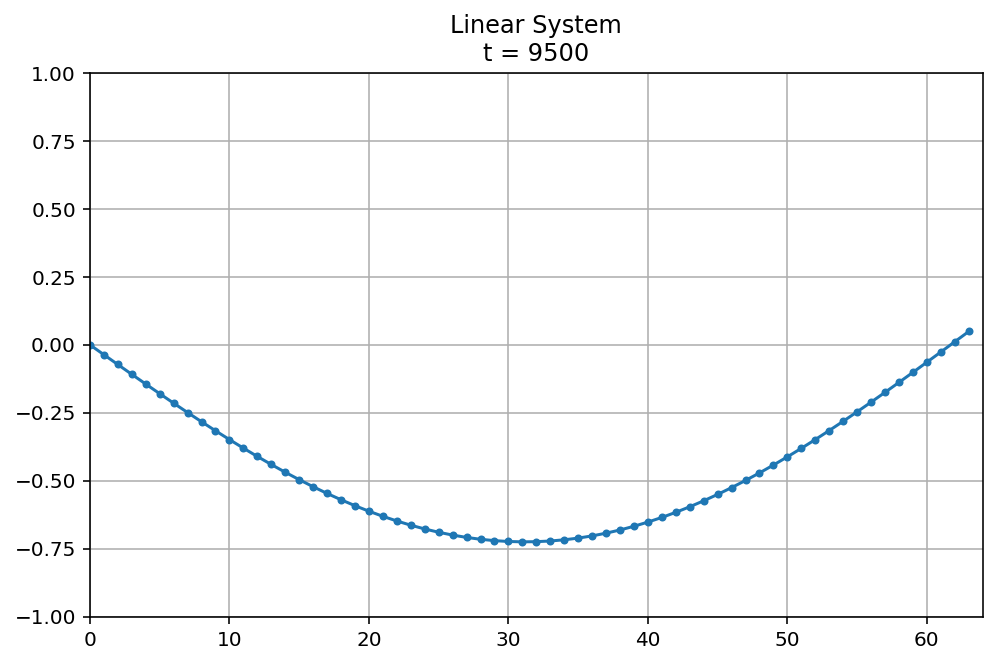

In [12]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# plot
# Set up the figure
fig = plt.figure(figsize = (8,5))
line, = plt.plot([], [], '.-')
plt.xlim(0, n)
plt.ylim(-1, 1)
plt.grid(True)

# Initialize the function
def init():
    line.set_data([], []) # start with a clean plot, then add positions
    return line,

# Animation function
frame = 20 # set frames = 20 to update, indicating that the animation will include 20 updates, spaced by 500 since t_max = 10000
def animate(i):
    y = x[i*500, :n]  # update to match ever 20th frame, corresponding to every 200-iteration.
    line.set_data(range(n), y)
    plt.title(f'Linear System\nt = {i*500}') 
    return line,


# Create the animation, each update will be spaced by 500 milliseconds
anim = FuncAnimation(fig, animate, init_func=init, frames=frame, interval=500, blit = True)

# Display the animation
from IPython.display import HTML
HTML(anim.to_html5_video())

# Exercise 2


[ 0.         -0.03626561 -0.07222439 -0.10757042 -0.14200012 -0.17521458
 -0.20692314 -0.23684829 -0.26473191 -0.29034261 -0.31348374 -0.33400142
 -0.35179196 -0.36680782 -0.37906115 -0.38862428 -0.39562648 -0.40024702
 -0.40270473 -0.40324494 -0.40212514 -0.39960062 -0.3959117  -0.39127357
 -0.38586947 -0.37984733 -0.37331977 -0.36636669 -0.35903987 -0.3513687
 -0.34336636 -0.33503582 -0.32637517 -0.31738187 -0.30805575 -0.29840062
 -0.28842463 -0.2781397  -0.26756032 -0.25670221 -0.24558128 -0.23421307
 -0.2226127  -0.2107954  -0.19877712 -0.18657506 -0.17420778 -0.16169489
 -0.1490561  -0.13631013 -0.12347348 -0.11055938 -0.09757724 -0.08453266
 -0.07142789 -0.05826284 -0.04503633 -0.03174742 -0.01839667 -0.00498716
  0.00847492  0.0219801   0.03551592  0.04906767]


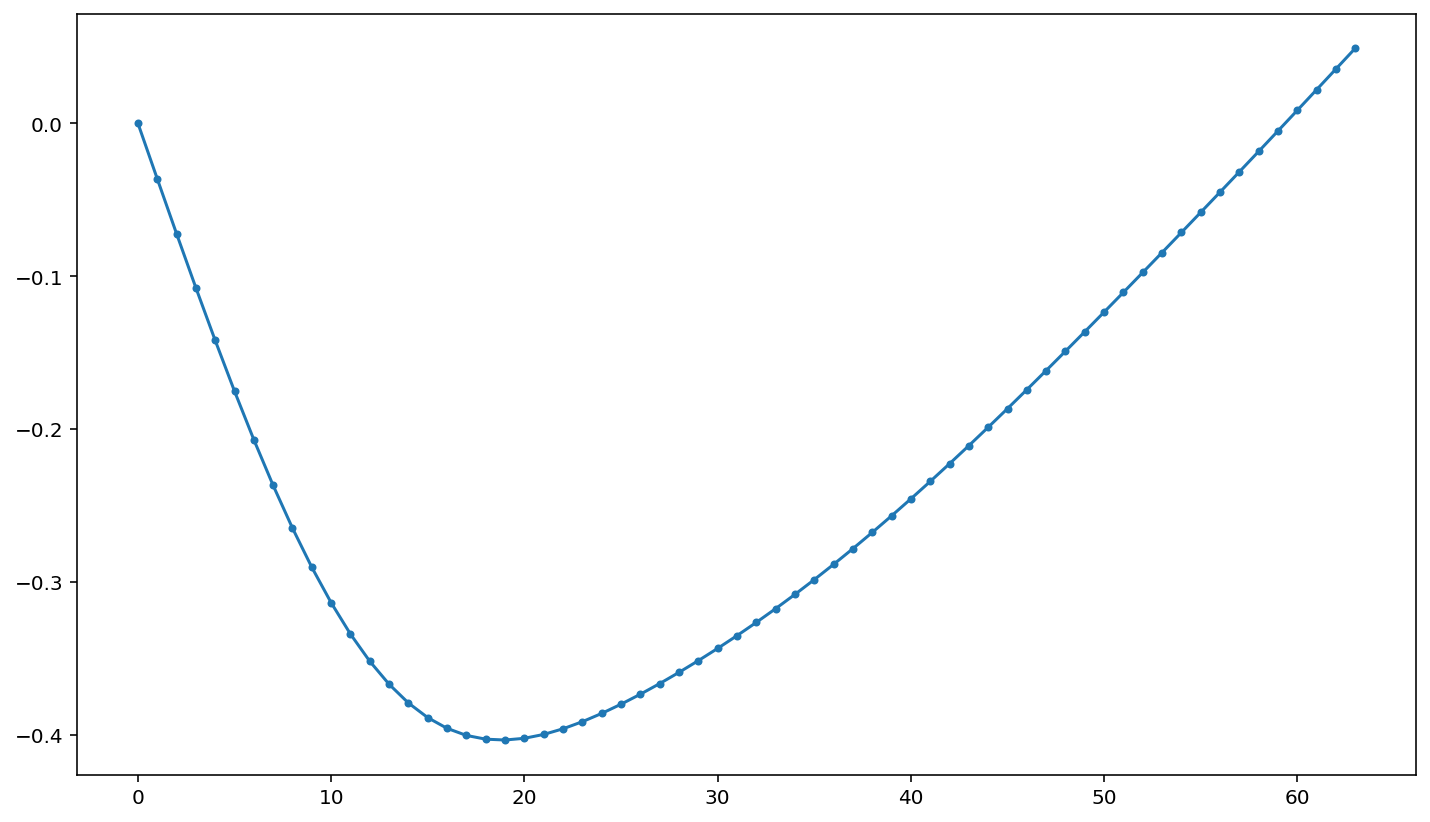

In [15]:
import numpy as np 

# set up 
alpha = 0.1
n = 64 
k = 1
t_max = 10000
position = lambda j: np.sin(np.pi*j/n)

# initial conditions
x0 = np.array([position(j) for j in range(n)])
v0 = np.zeros(n)

# differential equations
def dxdt_nonlinear(t, x):
    # x[:n] are positions (x), x[n:] are velocities (v)
    x, v = x[:n], x[n:] # positions and velocities
    dxdt = v 
    dvdt = np.zeros(n)
    dvdt[1:-1] = k * (x[2:n] + x[:n-2] - 2 * x[1:n-1]) * (1 + alpha * (x[2:n] - x[:n-2])) # nonlinear system
    return np.concatenate((dxdt, dvdt), axis=0)

# RK4 Method
def rk41d(f,x0,t0,tmax,dt):
    t = np.arange(t0,tmax+dt,dt)
    x = np.zeros((len(t),len(x0)))
    x[0,:] = x0
    for n in range(len(t)-1):
        k1 = f(t[n], x[n,:])
        k2 = f(t[n] + dt/2, x[n,:] + dt/2 * k1)
        k3 = f(t[n] + dt/2, x[n,:] + dt/2 * k2)
        k4 = f(t[n] + dt, x[n,:] + dt * k3)
        x[n+1] = x[n] + dt/6 * (k1 + 2*k2 + 2*k3 + k4)
    return t, x

# solve the system
initial_conditions = np.concatenate((x0, v0),axis=0)
# apply RK4 method
t, x = rk41d(dxdt_nonlinear, initial_conditions, 0, t_max, 1)

#print(x[0,:n])
print(x[5000, :n])

import matplotlib.pyplot as plt
plt.plot(x[5000, :n], '.-')

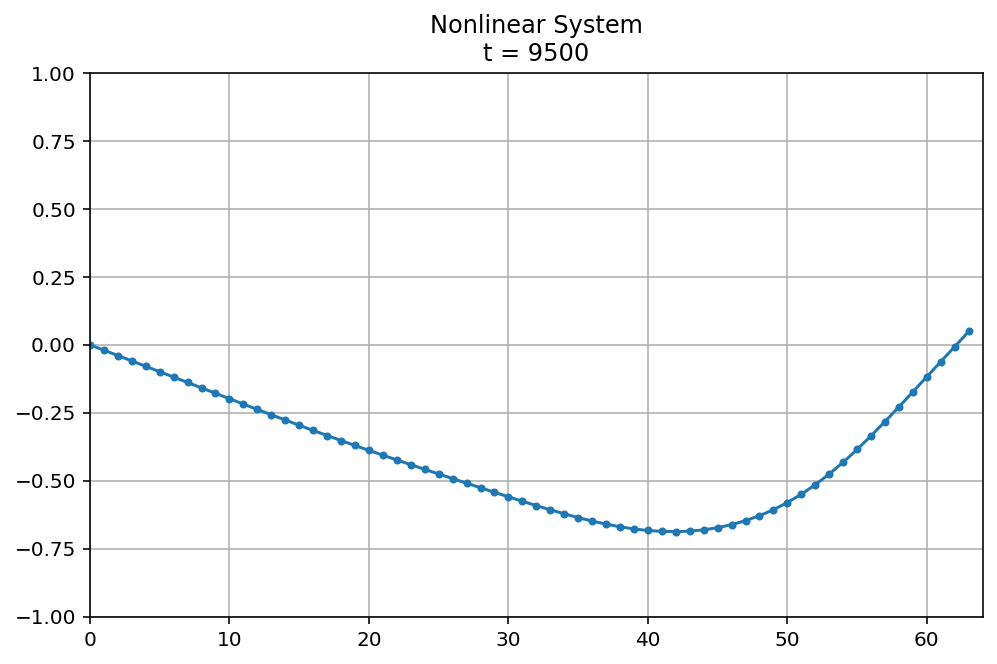

In [16]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# plot
# Set up the figure
fig = plt.figure(figsize = (8,5))
line, = plt.plot([], [], '.-')
plt.xlim(0, n)
plt.ylim(-1, 1)
plt.grid(True)

# Initialize the function
def init():
    line.set_data([], []) # start with a clean plot, then add positions
    return line,

# Animation function
frame = 20 # set frames = 20 to update, indicating that the animation will include 20 updates, spaced by 500 since t_max = 10000
def animate(i):
    y = x[i*500, :n]  # update to match ever 20th frame, corresponding to every 200-iteration.
    line.set_data(range(n), y)
    plt.title(f'Nonlinear System\nt = {i*500}') 
    return line,


# Create the animation, each update will be spaced by 500 milliseconds
anim = FuncAnimation(fig, animate, init_func=init, frames=frame, interval=500, blit = True)

# Display the animation
from IPython.display import HTML
HTML(anim.to_html5_video())

# Obesrvation

From Exercise 1, we can see that the string of beads are oscillating evenly forever with a linear system. While, from the Exercise 2, we have a nonlinear system, an then we find that the string oscillates with some kinds of frequency. However, after a thousand iterations, we lose the control of a regular pattern.

However, it does not show a fully chaos. The energy distribution lets the string recurrently returns to its initial position, shown below. The peak bead of the string somehow goes back to 1 usually.

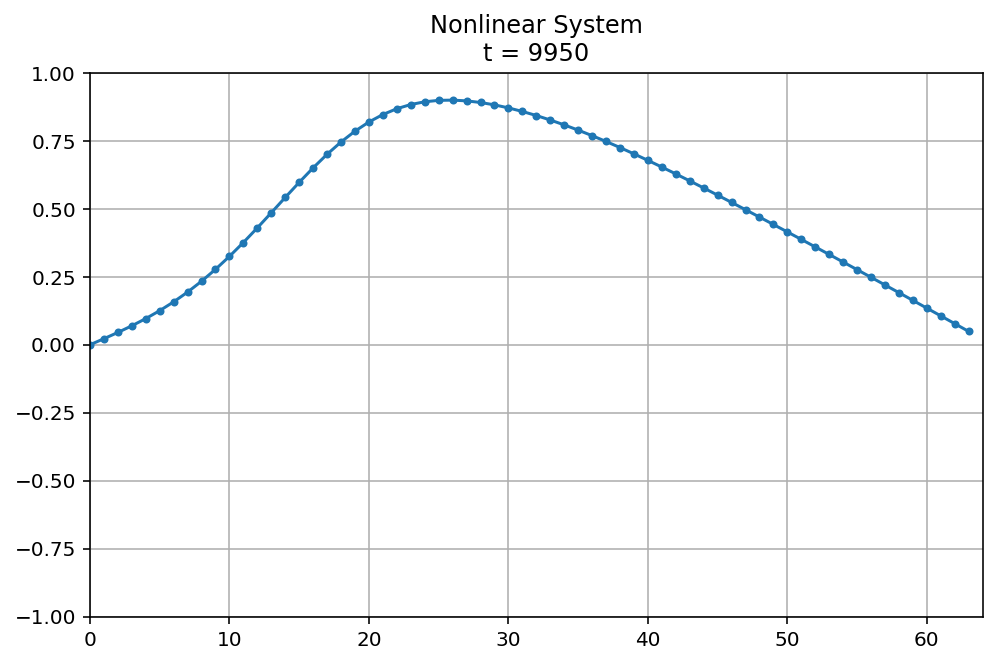

In [19]:
# a longer time for observing the oscillation

import numpy as np 

# set up 
alpha = 0.1
n = 64 
k = 1
t_max = 100000
position = lambda j: np.sin(np.pi*j/n)

# initial conditions
x0 = np.array([position(j) for j in range(n)])
v0 = np.zeros(n)

# differential equations
def dxdt_nonlinear(t, x):
    # x[:n] are positions (x), x[n:] are velocities (v)
    x, v = x[:n], x[n:] # positions and velocities
    dxdt = v 
    dvdt = np.zeros(n)
    dvdt[1:-1] = k * (x[2:n] + x[:n-2] - 2 * x[1:n-1]) * (1 + alpha * (x[2:n] - x[:n-2])) # nonlinear system
    return np.concatenate((dxdt, dvdt), axis=0)

# RK4 Method
def rk41d(f,x0,t0,tmax,dt):
    t = np.arange(t0,tmax+dt,dt)
    x = np.zeros((len(t),len(x0)))
    x[0,:] = x0
    for n in range(len(t)-1):
        k1 = f(t[n], x[n,:])
        k2 = f(t[n] + dt/2, x[n,:] + dt/2 * k1)
        k3 = f(t[n] + dt/2, x[n,:] + dt/2 * k2)
        k4 = f(t[n] + dt, x[n,:] + dt * k3)
        x[n+1] = x[n] + dt/6 * (k1 + 2*k2 + 2*k3 + k4)
    return t, x

# solve the system
initial_conditions = np.concatenate((x0, v0),axis=0)
# apply RK4 method
t, x = rk41d(dxdt_nonlinear, initial_conditions, 0, t_max, 1)



import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# plot
# Set up the figure
fig = plt.figure(figsize = (8,5))
line, = plt.plot([], [], '.-')
plt.xlim(0, n)
plt.ylim(-1, 1)
plt.grid(True)

# Initialize the function
def init():
    line.set_data([], []) # start with a clean plot, then add positions
    return line,

# Animation function
frame = 200 
def animate(i):
    y = x[i*50, :n] 
    line.set_data(range(n), y)
    plt.title(f'Nonlinear System\nt = {i*50}') 
    return line,


# Create the animation, each update will be spaced by 800 milliseconds
anim = FuncAnimation(fig, animate, init_func=init, frames=frame, interval=500, blit = True)

# Display the animation
from IPython.display import HTML
HTML(anim.to_html5_video())